In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_auc_score, roc_curve

In [5]:
data = pd.read_csv('card_transdata.csv', sep=',')
data.drop('repeat_retailer', axis=1, inplace=True)
data.used_chip = data.used_chip.astype(int)
data.used_pin_number = data.used_pin_number.astype(int)
data.online_order = data.online_order.astype(int)
data.fraud = data.fraud.astype(int)

In [ ]:
X = data.drop(columns=['fraud'])
y = data['fraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [7]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Logistic Regression

In [5]:
model_logi = LogisticRegression(
    solver='lbfgs',
    penalty='l2',
    max_iter=1000,
    random_state=42,
    class_weight='balanced',
)

In [6]:
model_logi.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

In [7]:
# Prédiction sur l'ensemble de test
y_pred_logi = model_logi.predict(X_test)

# Évaluation du modèle
accuracy = accuracy_score(y_test, y_pred_logi)
report = classification_report(y_test, y_pred_logi)

print(f"Accuracy : {accuracy:.2f}")
print("Classification Report :\n", report)

Accuracy : 0.93
Classification Report :
               precision    recall  f1-score   support

           0       0.99      0.93      0.96    182519
           1       0.58      0.95      0.72     17481

    accuracy                           0.93    200000
   macro avg       0.79      0.94      0.84    200000
weighted avg       0.96      0.93      0.94    200000



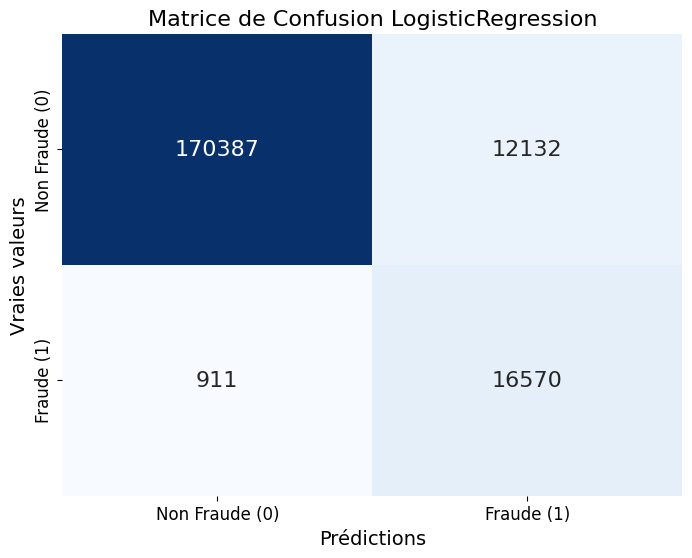

In [8]:
# Calcul de la matrice de confusion
cm = confusion_matrix(y_test, y_pred_logi)

# Création du graphique
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 16})

# Ajout des labels et du titre
plt.xlabel('Prédictions', fontsize=14)
plt.ylabel('Vraies valeurs', fontsize=14)
plt.title('Matrice de Confusion LogisticRegression', fontsize=16)
plt.xticks(ticks=[0.5, 1.5], labels=['Non Fraude (0)', 'Fraude (1)'], fontsize=12)
plt.yticks(ticks=[0.5, 1.5], labels=['Non Fraude (0)', 'Fraude (1)'], fontsize=12)

# Afficher le graphique
plt.show()

AUC-ROC pour le modèle XGBoost : 0.9795


C:\Users\delah\AppData\Local\Temp\ipykernel_28268\2347359057.py:14: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], 'k--', label='Random (AUC = 0.5)', color='red')


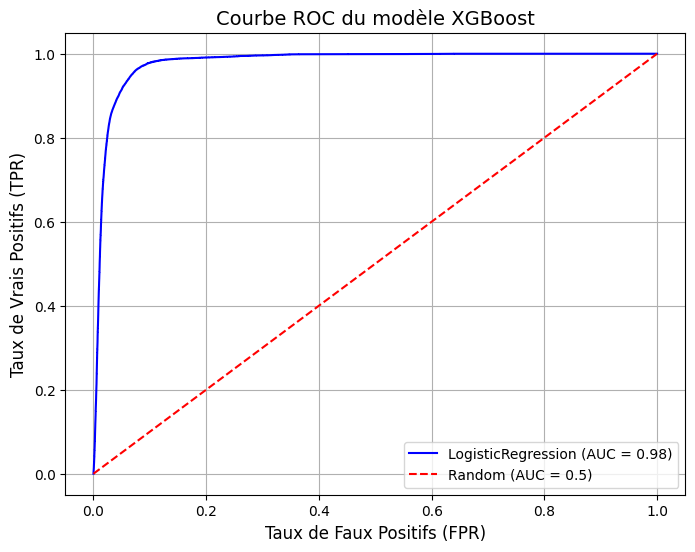

In [ ]:
y_proba_xgb = model_logi.predict_proba(X_test)[:, 1]


# Calcul du score AUC-ROC
auc_logi = roc_auc_score(y_test, y_proba_xgb)
print(f"AUC-ROC pour le modèle Logistic Regression : {auc_logi:.4f}")

# Calcul des courbes ROC
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_proba_xgb)

# Tracé de la courbe ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr_xgb, tpr_xgb, label=f"LogisticRegression (AUC = {auc_logi:.2f})", color='blue')
plt.plot([0, 1], [0, 1], 'k--', label='Random (AUC = 0.5)', color='red')

# Personnalisation du graphique
plt.xlabel('Taux de Faux Positifs (FPR)', fontsize=12)
plt.ylabel('Taux de Vrais Positifs (TPR)', fontsize=12)
plt.title('Courbe ROC du modèle XGBoost', fontsize=14)
plt.legend(loc='lower right')
plt.grid()
plt.show()

In [10]:
from sklearn.metrics import fbeta_score

# Calcul du F2-score
f2 = fbeta_score(y_test, y_pred_logi, beta=2)
print(f"F2-score : {f2:.4f}")

F2-score : 0.8400


In [14]:
data.dtypes

distance_from_home                float64
distance_from_last_transaction    float64
ratio_to_median_purchase_price    float64
repeat_retailer                     int32
used_chip                           int32
used_pin_number                     int32
online_order                        int32
fraud                               int32
dtype: object

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Meilleurs paramètres : {'C': 100, 'fit_intercept': True, 'penalty': 'l2'}
Meilleur score F2 : 0.6409253806222536
Accuracy : 0.95942
Precision : 0.8963853381867434
Recall : 0.605743378525256
F1-score : 0.7229466785007169
F2-score : 0.6477482657792677


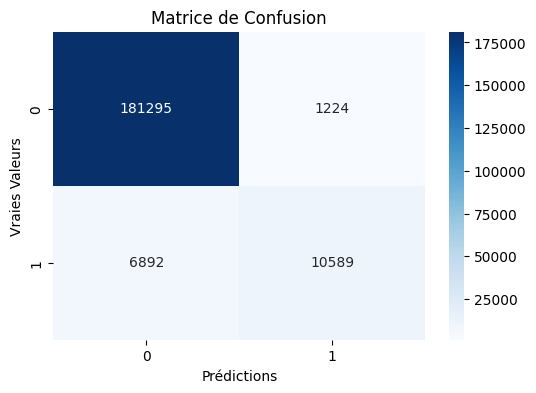

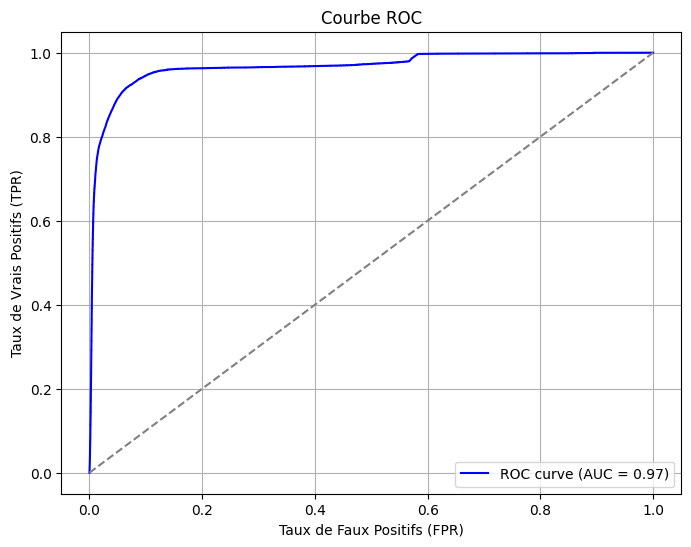

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import (
    make_scorer,
    fbeta_score,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    roc_curve,
    auc
)

# Définir le modèle
model = LogisticRegression(solver='liblinear')

# Définir la grille d'hyperparamètres
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.01, 0.1, 1, 10, 100],
    'fit_intercept': [True, False]
}

# Définir le scorer basé sur le F2-score
f2_scorer = make_scorer(fbeta_score, beta=2)

# Configurer GridSearchCV
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring=f2_scorer,
    cv=5,
    n_jobs=-1,
    verbose=2
)

# Effectuer la recherche en grille
grid_search.fit(X_train, y_train)

# Afficher les meilleurs hyperparamètres
print("Meilleurs paramètres :", grid_search.best_params_)
print("Meilleur score F2 :", grid_search.best_score_)

# Utiliser le meilleur modèle pour faire des prédictions
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Évaluer les performances du modèle
print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision :", precision_score(y_test, y_pred))
print("Recall :", recall_score(y_test, y_pred))
print("F1-score :", f1_score(y_test, y_pred))
print("F2-score :", fbeta_score(y_test, y_pred, beta=2))

# Matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Matrice de Confusion")
plt.xlabel("Prédictions")
plt.ylabel("Vraies Valeurs")
plt.show()

# Courbe ROC et AUC
y_pred_proba = best_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel("Taux de Faux Positifs (FPR)")
plt.ylabel("Taux de Vrais Positifs (TPR)")
plt.title("Courbe ROC")
plt.legend(loc="lower right")
plt.grid()
plt.show()
